# Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个二分类数据集
np.random.seed(42)
N = 100
X_pos = np.random.randn(N, 2) + np.array([2, 2])
X_neg = np.random.randn(N, 2) + np.array([-2, -2])
X = np.vstack([X_pos, X_neg])
y = np.array([1]*N + [0]*N).reshape(-1, 1)

In [11]:
X_bias = np.hstack([X, np.ones((X.shape[0],1))])

w = np.zeros((X_bias.shape[1], 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy(y_true, y_pred):
    eps = 1e-10
    return -np.mean(y_true * np.log(y_pred+eps) + (1-y_true) * np.log(1-y_pred+eps))

lr = 0.1
epochs = 100
loss_history = []

for epoch in range(epochs):
    z = X_bias @ w
    y_pred = sigmoid(z)
    loss = cross_entropy(y, y_pred)
    loss_history.append(loss)

    if epoch % 10 == 0:
        print(f'epoch: {epoch} \t loss: {loss}')

    grad = X_bias.T @ (y_pred - y) / X_bias.shape[0]

    w -= lr*grad

epoch: 0 	 loss: 0.6931471803599453
epoch: 10 	 loss: 0.16386997822861446
epoch: 20 	 loss: 0.0995800336063544
epoch: 30 	 loss: 0.07418650972261387
epoch: 40 	 loss: 0.060336930841325305
epoch: 50 	 loss: 0.05152036975502156
epoch: 60 	 loss: 0.04536947952932028
epoch: 70 	 loss: 0.0408093512067199
epoch: 80 	 loss: 0.03727873678626474
epoch: 90 	 loss: 0.034454818472726904


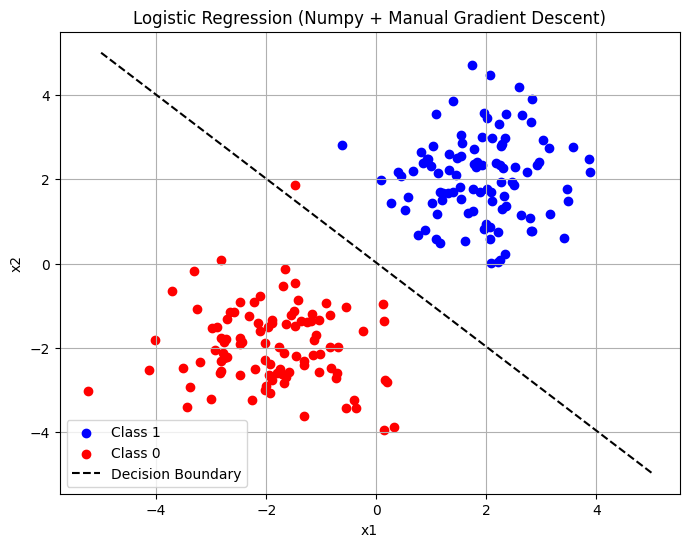

In [12]:
# 绘制决策边界
x1 = np.linspace(-5, 5, 100)
x2 = -(w[0]*x1 + w[2]) / w[1]  # 决策边界: w1*x1 + w2*x2 + b = 0

plt.figure(figsize=(8, 6))
plt.scatter(X[:N, 0], X[:N, 1], c='blue', label='Class 1')
plt.scatter(X[N:, 0], X[N:, 1], c='red', label='Class 0')
plt.plot(x1, x2.ravel(), 'k--', label='Decision Boundary')
plt.legend()
plt.title('Logistic Regression (Numpy + Manual Gradient Descent)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# LDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成二维线性可分数据
np.random.seed(0)
n_samples = 50

mean1 = [2, 2]
mean2 = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

X1 = np.random.multivariate_normal(mean1, cov, n_samples)
X2 = np.random.multivariate_normal(mean2, cov, n_samples)

# 样本数
n_1 = X1.shape[0]
n_2 = X2.shape[0]

X = np.vstack((X1, X2))
y = np.array([1]*n_samples + [0]*n_samples)

LDA求的是 投影方向 w 

$$

\frac{w^TS_bw}{w^TS_ww}

$$

其中 $S_b$ 是类间： 

$$
S_b = \sum_{k=1}^K n_k(\mu_k - \mu)(\mu_k - \mu)^T
$$

$S_w$ 则是类内：

$$
S_w = \sum_{k=1}^K \sum_{x_i\in C_k} (x_i-\mu_k)(x_i-\mu_k)^T
$$

但最后只需要转化为特征值求解问题：

$$
w^* = S^{-1}_w(\mu_1 - \mu_2) 
$$

In [2]:
mu_1 = np.mean(X1, axis=0)
mu_2 = np.mean(X2, axis=0)

S_w = np.cov(X1.T) +  np.cov(X2.T)
w = np.linalg.inv(S_w) @ (mu_1 - mu_2)

X_proj = X @ w
threshold = (mu_1 @ w + mu_2 @ w) / 2  # 分界点

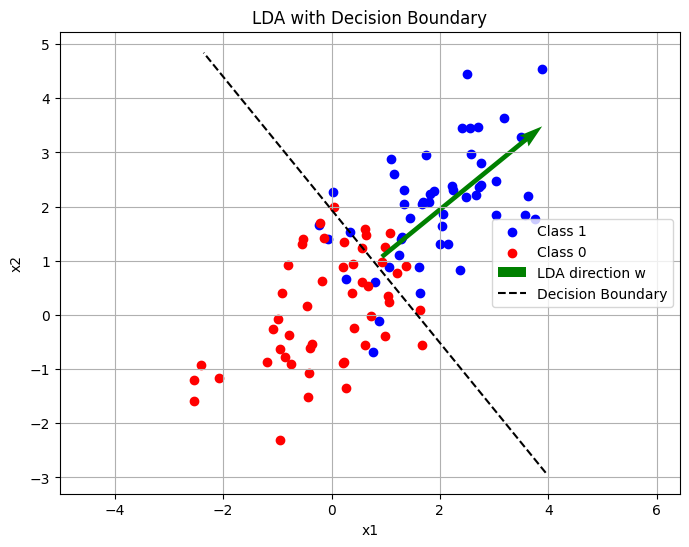

In [3]:
# 更新绘图：添加决策边界（投影值阈值划分）
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='Class 0')

# 投影方向
origin = np.mean(X, axis=0)
w_dir = w / np.linalg.norm(w)
plt.quiver(*origin, *w_dir, scale=3, color='green', label='LDA direction w')

# 画出决策边界：通过 origin + shift*w_dir，平移到阈值位置
threshold = (mu_1 @ w + mu_2 @ w) / 2
# 在原点上的阈值位置的投影向量：
boundary_point = origin + ((threshold - origin @ w_dir) * w_dir)

# 垂直于 w_dir 的边界线方向
normal_vec = np.array([-w_dir[1], w_dir[0]])
line_range = np.linspace(-5, 5, 2)
boundary_line = boundary_point[None, :] + line_range[:, None] * normal_vec

plt.plot(boundary_line[:, 0], boundary_line[:, 1], 'k--', label='Decision Boundary')

plt.legend()
plt.title('LDA with Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.axis('equal')
plt.show()


In [6]:
mu_1 = np.mean(X1, axis=0)
mu_2 = np.mean(X2, axis=0)

S_w = (n_1-1)/n_1*np.cov(X1.T) +  (n_2-1)/n_2*np.cov(X2.T)
w = np.linalg.inv(S_w) @ (mu_1 - mu_2)

X_proj = X @ w
threshold = (mu_1 @ w + mu_2 @ w) / 2  # 分界点

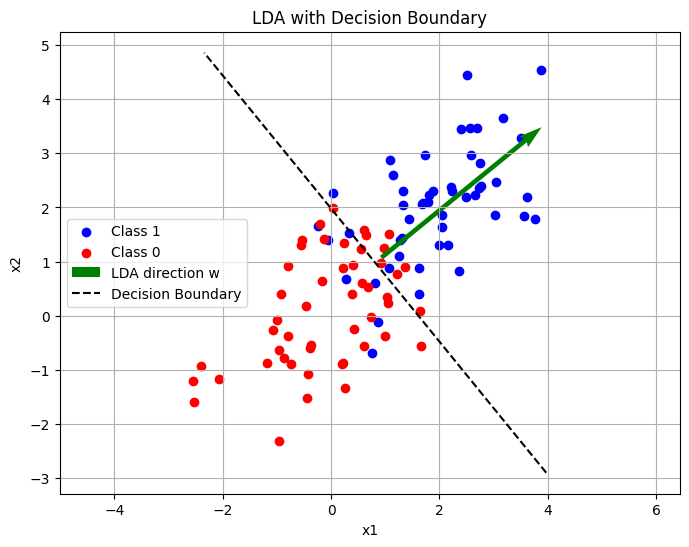

In [7]:
# 更新绘图：添加决策边界（投影值阈值划分）
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='Class 0')

# 投影方向
origin = np.mean(X, axis=0)
w_dir = w / np.linalg.norm(w)
plt.quiver(*origin, *w_dir, scale=3, color='green', label='LDA direction w')

# 画出决策边界：通过 origin + shift*w_dir，平移到阈值位置
threshold = (mu_1 @ w + mu_2 @ w) / 2
# 在原点上的阈值位置的投影向量：
boundary_point = origin + ((threshold - origin @ w_dir) * w_dir)

# 垂直于 w_dir 的边界线方向
normal_vec = np.array([-w_dir[1], w_dir[0]])
line_range = np.linspace(-5, 5, 2)
boundary_line = boundary_point[None, :] + line_range[:, None] * normal_vec

plt.plot(boundary_line[:, 0], boundary_line[:, 1], 'k--', label='Decision Boundary')

plt.legend()
plt.title('LDA with Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.axis('equal')
plt.show()
